In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [25]:
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 14
})

In [26]:
cond_merged_df = pd.read_csv("data/condensed_dataset/merged.tsv", sep=",", encoding="utf-8")
merged_df = pd.read_csv("data/cleaned_dataset/refined.csv", sep=",", encoding="utf-8")

In [27]:
cond_merged_df["cnt"] = cond_merged_df["Speaker_party"].map(cond_merged_df["Speaker_party"].value_counts())
merged_df["cnt"] = merged_df["Speaker_party"].map(merged_df["Speaker_party"].value_counts())

In [28]:
diz = {
    'GAL (DI, Id, GS, M, MPL, RI, E-E)':'GAL',
 'GAL (GS, LA-nS, MpA, NPSI, PpI)':'GAL',
 'GAL (GS, LA-nS, MpA, NPSI, PpI, IdV, VGF)':'GAL',
 'GAL (GS, PpI, FV, M)':'GAL',
 'GAL (GS, PpI, FV, M, MBI, Id)':'GAL',
 'GAL (GS, PpI, M, Id, E-E, MPL)':'GAL',
 'GAL (GS, PpI, M, Id, E-E, MPL, RI)':'GAL',
 'GAL (GS, PpI, M, MBI, Id, E-E)':'GAL',
}

In [29]:
cond_merged_df["Speaker_party"] = cond_merged_df["Speaker_party"].map(diz).fillna(cond_merged_df['Speaker_party'])

In [30]:
txt_len = cond_merged_df.groupby("Speaker_party").mean("text_length")["text_length"]
speechs_cnt = cond_merged_df.groupby("Speaker_party").mean("text_length")["cnt"]

stats.spearmanr(txt_len, speechs_cnt)

SignificanceResult(statistic=-0.7822162903844069, pvalue=7.598147833470065e-08)

In [31]:
def n_speeches(df, n=12):
    speech_count = df.groupby("Speaker_party").size().reset_index(name="count")

    speech_count = speech_count.merge(df[["Speaker_party", "Party_orientation"]].drop_duplicates(), on="Speaker_party")
    color_map = {
        '-': '#8c8c8c',
        'Centro verso centro-sinistra': '#f7285c',
        'Centro-sinistra verso sinistra': '#ed2f2f',
        'Estrema destra': 'black',
        'Sinistra': 'red',
        'Centro': '#4d47f5',
        'Centro verso centro-destra': '#4d47f5',
        'Centro-destra': 'darkblue',
        "Centro-sinistra": "red",
        "Destra verso estrema destra": "black",
        "Pigliatutto": '#c7b514'
    }

    speech_count = speech_count.sort_values(by="count", ascending=False).head(n)
    colors = speech_count["Party_orientation"].map(color_map)

    plt.figure(figsize=(6, 6))
    plt.bar(speech_count["Speaker_party"], speech_count["count"], color=colors)
    plt.xlabel("Party")
    plt.ylabel("Number of Speeches")
    #plt.title("Count of Speeches by Party")
    plt.xticks(fontsize = 9, rotation=90)
    '''
    plt.legend(fontsize = 9, handles=[plt.Rectangle((0,0),1,1, color=color_map[key]) for key in color_map], 
               labels=color_map.keys(), 
               title="Party Orientation", 
               bbox_to_anchor=(1.05, 1), 
               loc='upper left')
    '''
    plt.tight_layout()
    plt.show()


In [40]:
def length_dist(df, n=12):
    df["text_length"] = df["text"].str.len()
    stats = df.groupby("Speaker_party")["text_length"].agg(['mean', 'std']).reset_index()

    stats = stats.merge(df[["Speaker_party", "Party_orientation"]].drop_duplicates(), on="Speaker_party")
    
    color_map = {
        '-': '#8c8c8c',
        'Centro verso centro-sinistra': '#f7285c',
        'Centro-sinistra verso sinistra': '#ed2f2f',
        'Estrema destra': 'black',
        'Sinistra': 'red',
        'Centro': '#4d47f5',
        'Centro verso centro-destra': '#4d47f5',
        'Centro-destra': 'darkblue',
        "Centro-sinistra": "red",
        "Destra verso estrema destra": "black",
        "Pigliatutto": '#c7b514'
    }
    
    stats = stats.sort_values(by="mean", ascending=False).head(n)
    colors = stats["Party_orientation"].map(color_map)
    
    plt.figure(figsize=(6, 6))
    plt.bar(stats["Speaker_party"], stats["mean"], yerr=stats["std"], capsize=5, color=colors, alpha=0.8)
    plt.xlabel("Party")
    plt.ylabel("Avg. Text Length")
    plt.xticks(fontsize=9, rotation=90)
    
    plt.tight_layout()
    plt.show()

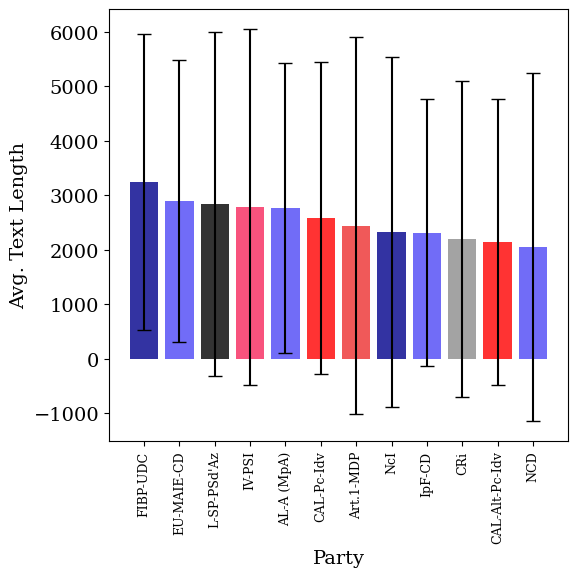

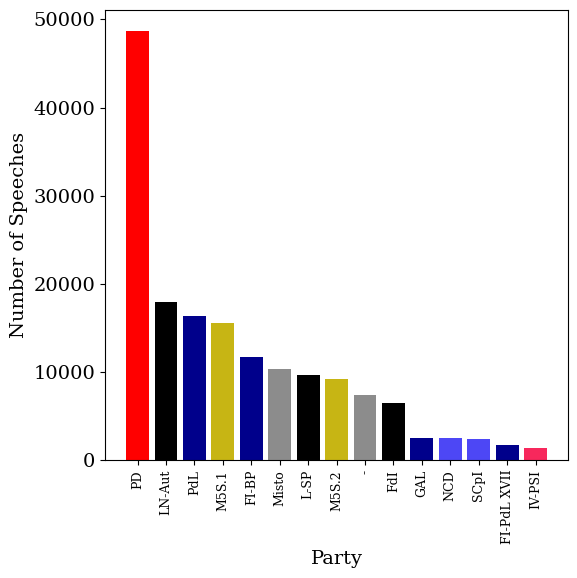

In [41]:
length_dist(cond_merged_df, 12)
n_speeches(cond_merged_df, 15)

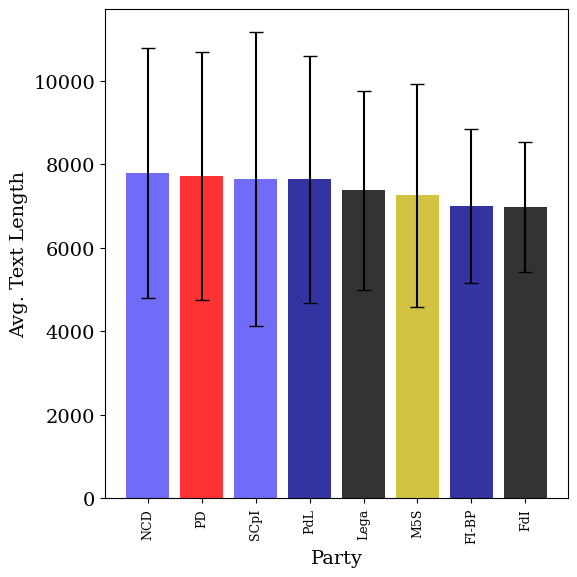

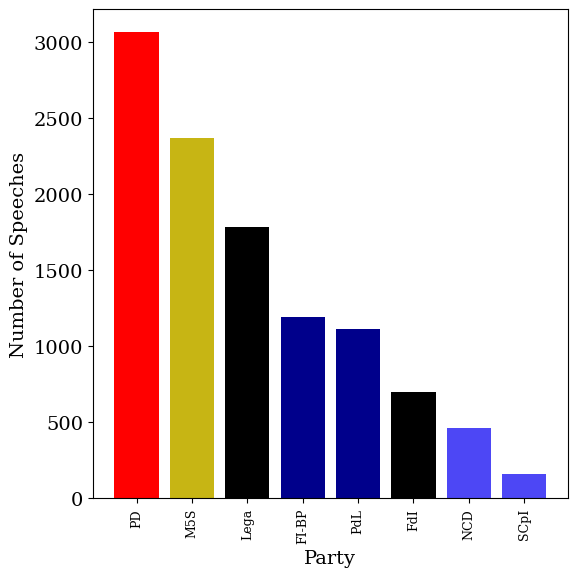

In [42]:
length_dist(merged_df)
n_speeches(merged_df)

In [164]:
def istogramma_len(df, title):
    #Istogramma della lunghezza dei testi
    plt.figure(figsize=(6,6))
    sns.histplot(df['text_length'], bins=40, kde=True)
    #plt.title(title, fontsize = 14)
    plt.xlabel("Number of Characters")
    plt.ylabel("Frequency")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

C:\Users\fabio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


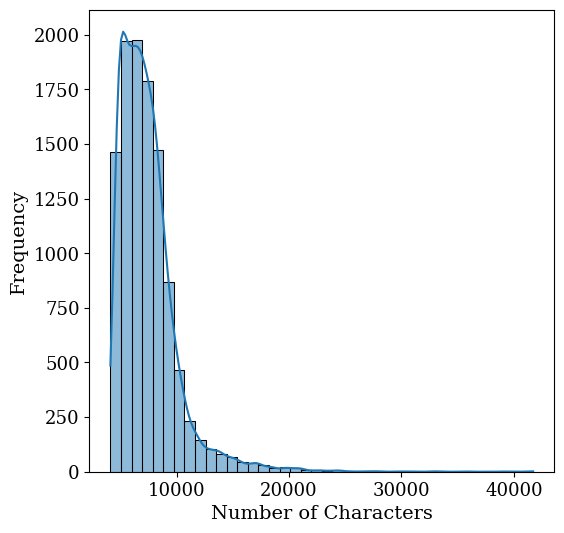

In [38]:
istogramma_len(merged_df, "Distribution of Speech Lengths (Cleaned)")

C:\Users\fabio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


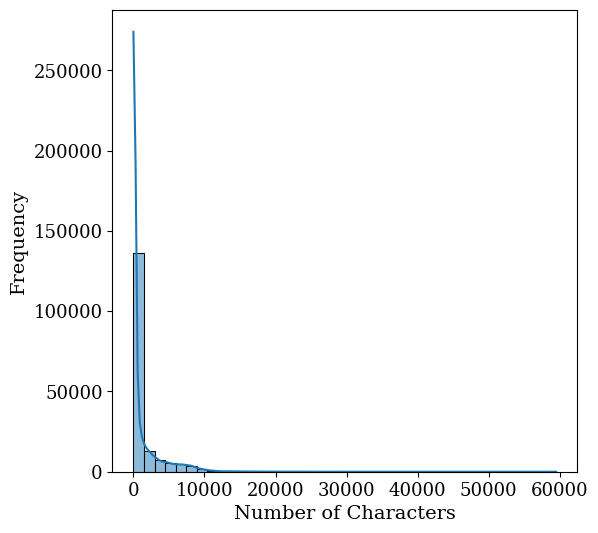

In [39]:
istogramma_len(cond_merged_df, "Distribution of Speech Lengths (Original)")